In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
test_set = pd.read_csv('raw/TestSet.csv')
train_set = pd.read_csv('raw/TrainingSet.csv')
test_subset = pd.read_csv('raw/TestSubset.csv')
train_subset = pd.read_csv('raw/TrainingSubset.csv')

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258588 entries, 0 to 258587
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   EbayID                   258588 non-null  float64
 1   QuantitySold             258588 non-null  int64  
 2   Price                    258588 non-null  float64
 3   PricePercent             258588 non-null  float64
 4   StartingBidPercent       258588 non-null  float64
 5   SellerName               258588 non-null  object 
 6   SellerClosePercent       258588 non-null  float64
 7   Category                 258588 non-null  int64  
 8   PersonID                 258588 non-null  int64  
 9   StartingBid              258588 non-null  float64
 10  AvgPrice                 258588 non-null  float64
 11  EndDay                   258588 non-null  int64  
 12  HitCount                 258588 non-null  int64  
 13  AuctionAvgHitCount       258588 non-null  int64  
 14  Item

In [4]:
train_set.head()

,EbayID,QuantitySold,Price,PricePercent,StartingBidPercent,SellerName,SellerClosePercent,Category,PersonID,StartingBid,...,AuctionHitCountAvgRatio,BestOffer,ReturnsAccepted,IsHOF,ItemListedCount,AuctionCount,AuctionSaleCount,SellerAuctionCount,SellerAuctionSaleCount,AuctionMedianPrice
0,1.609830e+11,1,27.25,1.4787,0.0537,petesandi,0.925926,73396,9174,0.99,...,29,1.540541,0,1,1,583,291,54,50,12.26
1,3.905500e+11,1,43.00,1.4422,0.3350,graphn4fun,0.990566,27278,11046,9.99,...,55,0.404762,0,0,0,120,43,106,105,24.45
2,2.009010e+11,1,11.00,0.5969,0.5426,hondo19461946,0.422131,73396,9174,10.00,...,21,0.324324,0,1,1,583,291,244,103,12.26
3,2.711630e+11,0,10.00,0.5426,0.5426,winemeyer45,0.245098,73396,9174,10.00,...,26,0.270270,0,0,1,583,291,102,25,12.26
4,3.106120e+11,0,9.99,1.9159,1.9159,chucksmemorabilia,0.295359,73396,17956,9.99,...,53,0.200000,0,1,0,137,44,237,70,3.02


In [5]:
train = train_set.drop(['EbayID','QuantitySold','SellerName'], axis=1)
train_target = train_set['QuantitySold']

_, n_features = train.shape

C:\anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


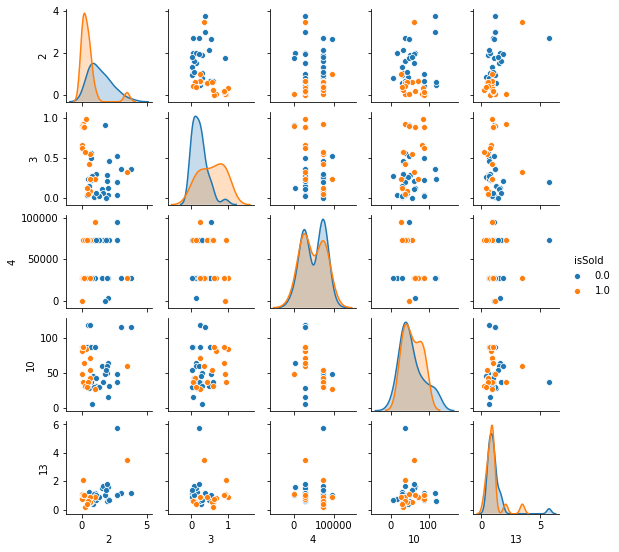

In [6]:
df = DataFrame(np.hstack((train,train_target[:, None])), columns=list(range(n_features)) + ["isSold"])
_ = sns.pairplot(df[:50], vars=[2,3,4,10,13], hue="isSold", size=1.5)

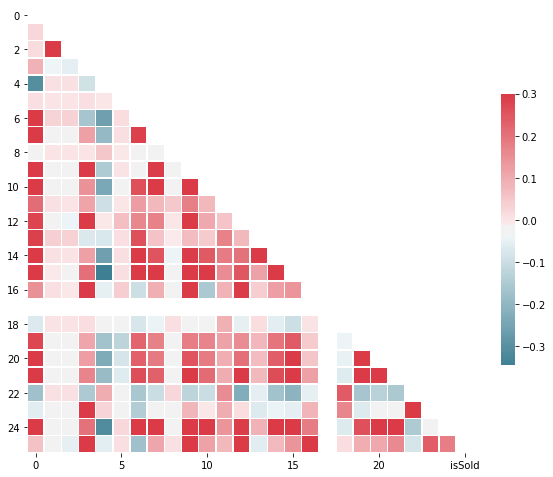

In [7]:
plt.figure(figsize=(10,10))

corr = df.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax = .3,
                square=True, xticklabels=5, yticklabels=2,
                linewidths=.5, cbar_kws={"shrink":.5})

plt.yticks(rotation=0)

plt.show()

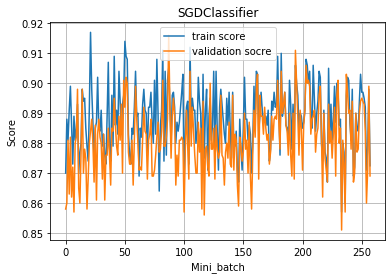

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# prepare data
test_set = pd.read_csv('raw/TestSet.csv')
train_set = pd.read_csv('raw/TrainingSet.csv')

train = train_set.drop(['EbayID','QuantitySold','SellerName'], axis=1)
train_target = train_set['QuantitySold']

n_trainSamples, n_features = train.shape

def plot_learning(clf,title):

    plt.figure()

    validationScore = []
    
    trainScore = []
    
    mini_batch = 1000

    for idx in range(int(np.ceil(n_trainSamples / mini_batch))):
        x_batch = train[idx * mini_batch: min((idx + 1) * mini_batch, n_trainSamples)]
        y_batch = train_target[idx * mini_batch: min((idx + 1) * mini_batch, n_trainSamples)]

        if idx > 0:
            validationScore.append(clf.score(x_batch, y_batch))
        clf.partial_fit(x_batch, y_batch, classes=range(5))
        if idx > 0:
            trainScore.append(clf.score(x_batch, y_batch))
    plt.plot(trainScore, label="train score")
    plt.plot(validationScore, label="validation socre")
    plt.xlabel("Mini_batch")
    plt.ylabel("Score")
    plt.legend(loc='best')
    plt.grid()
    plt.title(title)

scaler = StandardScaler()
train = scaler.fit_transform(train)

clf = SGDClassifier(penalty='l2', alpha=0.001)
plot_learning(clf,"SGDClassifier")

plt.show()

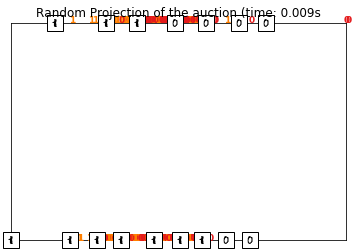

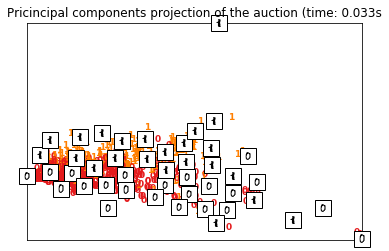

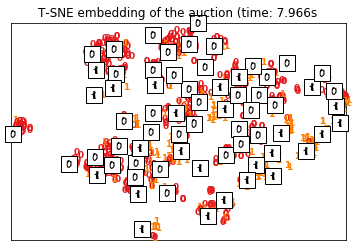

In [9]:
from sklearn import (manifold, decomposition, random_projection)
from matplotlib import offsetbox
from time import time

images= []
images.append([[  0. ,   0. ,   5. ,  13. ,   9. ,   1. ,   0. ,   0. ],
 [  0. ,   0. ,  13. ,  15. ,  10. ,  15. ,   5. ,   0. ],
 [  0. ,   3. ,  15. ,   2. ,   0. ,  11. ,   8. ,   0. ],
 [  0. ,   4. ,  12. ,   0. ,   0. ,   8. ,   8. ,   0. ],
 [  0. ,   5. ,   8. ,   0. ,   0. ,   9. ,   8. ,   0. ],
 [  0. ,   4. ,  11. ,   0. ,   1. ,  12. ,   7. ,   0. ],
 [  0. ,   2. ,  14. ,   5. ,  10. ,  12. ,   0. ,   0. ],
 [  0. ,   0. ,   6. ,  13. ,  10. ,   0. ,   0. ,   0. ]])

images.append([[  0. ,   0. ,   0. ,  12. ,  13. ,   5. ,   0. ,   0. ],
 [  0. ,   0. ,   0. ,  11. ,  16. ,   9. ,   0. ,   0. ],
 [  0. ,   0. ,   3. ,  15. ,  16. ,   6. ,   0. ,   0. ],
 [  0. ,   7. ,  15. ,  16. ,  16. ,   2. ,   0. ,   0. ],
 [  0. ,   0. ,   1. ,  16. ,  16. ,   3. ,   0. ,   0. ],
 [  0. ,   0. ,   1. ,  16. ,  16. ,   6. ,   0. ,   0. ],
 [  0. ,   0. ,   1. ,  16. ,  16. ,   6. ,   0. ,   0. ],
 [  0. ,   0. ,   0. ,  11. ,  16. ,  10. ,   0. ,   0. ]])


show_instancees = 1000

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i,0], X[i,1], str(train_target[i]),
                 color=plt.cm.Set1(train_target[i] / 2.),
                 fontdict={'weight':'bold','size':9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])  # just something big
    for i in range(show_instancees):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.r_[shown_images, [X[i]]]
        auctionbox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(images[train_target[i]], cmap=plt.cm.gray_r), X[i])
        ax.add_artist(auctionbox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

start_time = time()
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
rp.fit(train[:show_instancees])
train_projected = rp.transform(train[:show_instancees])
plot_embedding(train_projected, "Random Projection of the auction (time: %.3fs" % (time() - start_time))

start_time = time()
train_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(train[:show_instancees])
plot_embedding(train_pca, "Pricincipal components projection of the auction (time: %.3fs" % (time() - start_time))

start_time = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
train_tsne = tsne.fit_transform(train[:show_instancees])
plot_embedding(train_tsne, "T-SNE embedding of the auction (time: %.3fs" % (time() - start_time))

In [10]:
from sklearn.metrics import (precision_score, recall_score, f1_score)

test = test_set.drop(['EbayID','QuantitySold','SellerName'],axis=1)
test_target = test_set['QuantitySold']
test = scaler.fit_transform(test)

test_pred = clf.predict(test) 

print("SGDClassifier training performance on testing dataset:" )
print("\tPrecision: %1.3f " % precision_score(test_target, test_pred))
print("\tRecall: %1.3f" % recall_score(test_target, test_pred))
print("\tF1: %1.3f \n" % f1_score(test_target, test_pred))

SGDClassifier training performance on testing dataset:
	Precision: 0.820 
	Recall: 0.735
	F1: 0.775 



SGD regressor prediction result on testing data: 0.935


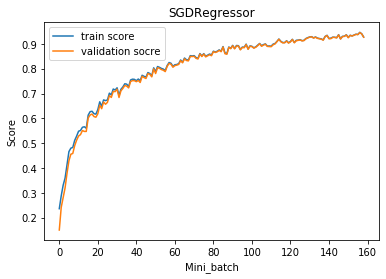

In [11]:
from sklearn.linear_model import SGDRegressor
import random
from sklearn.preprocessing import MinMaxScaler

# prepare data
test_subset = pd.read_csv('raw/TestSubset.csv')
train_subset = pd.read_csv('raw/TrainingSubset.csv')

train = train_subset.drop(['EbayID','Price','SellerName'],axis=1)
train_target = train_subset['Price']

scaler = MinMaxScaler()
train = scaler.fit_transform(train)
n_trainSamples, n_features = train.shape

# ploting example from scikit-learn
def plot_learning(clf,title):

    plt.figure()
    validationScore = []
    trainScore = []
    mini_batch = 500
    # define the shuffle index
    ind = list(range(n_trainSamples))
    random.shuffle(ind)

    for idx in range(int(np.ceil(n_trainSamples / mini_batch))):
        x_batch = train[ind[idx * mini_batch: min((idx + 1) * mini_batch, n_trainSamples)]]
        y_batch = train_target[ind[idx * mini_batch: min((idx + 1) * mini_batch, n_trainSamples)]]

        if idx > 0:
            validationScore.append(clf.score(x_batch, y_batch))
        clf.partial_fit(x_batch, y_batch)
        if idx > 0:
            trainScore.append(clf.score(x_batch, y_batch))

    plt.plot(trainScore, label="train score")
    plt.plot(validationScore, label="validation socre")
    plt.xlabel("Mini_batch")
    plt.ylabel("Score")
    plt.legend(loc='best')
    plt.title(title)

sgd_regresor = SGDRegressor(penalty='l2',alpha=0.001)
plot_learning(sgd_regresor,"SGDRegressor")

test = test_subset.drop(['EbayID','Price','SellerName'],axis=1)
test = scaler.fit_transform(test)
test_target = test_subset['Price']

print("SGD regressor prediction result on testing data: %.3f" % sgd_regresor.score(test,test_target))

plt.show()